# Proyecto #1 - Regresion Lineal a pie

## 1. Importación de Librerias

In [559]:
%matplotlib inline
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

import sklearn as sk
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



## 2. Creación de Clase

In [594]:
class RegresionLineal:
    
    def __init__(self, epochs = 1000, learning_rate=0.001, nombre=None, imprimir_error_cada=None):
       
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.pendiente = None
        self.intercepto = 0
        self.nombre = nombre
        self.imprimir_error_cada = imprimir_error_cada
        self.estructura_parametros = None
        self.estructura_error = None
        self.estructura_prediccion = None
        self.X_Train = None
        self.Y_Train = None
        self.epochs = epochs
        self.prueba54 = None

        
        #se definnen todos estos atributos para que pueda accederse a ellos por cualquier metodo de la clase. 
    
    
    def ajustar(self, X_Train, Y_Train, epochs=None, imprimir_error_cada=None, learning_rate=None):
        
        
        
        if learning_rate is None:
            learning_rate = self.learning_rate # se verifica si se ha dado un valor para el learning_rate si no se utilizara 0.001 definido anteriormente
        
        if imprimir_error_cada is None:
            imprimir_error_cada = self.imprimir_error_cada #lo mismo para imprimir error 
            
        if epochs is None:
            epochs = self.epochs #lo mismo para epochs
            
       
        if learning_rate is not None:
            self.learning_rate = learning_rate # aqui se busca evaluar si si existe un valor para learning rate en la funcion ajustar y de ser asi se actualizara al valor especificado en la funcion ajustar
        
        if imprimir_error_cada is not None:
            self.imprimir_error_cada = imprimir_error_cada   
        
        if epochs is not None:
            self.epochs = epochs
        

        self.X_Train = X_Train
        self.Y_Train = Y_Train
        
        n_filas, n_columnas = X_Train.shape #devuelve una tupla con la forma del dataset ingresado 
        self.pendiente = np.zeros(n_columnas) # 1
        dicc_error = [] #para registrar los errores
        dicc_error_cada = [] # para registrar cada "imprimir_error_cada"
        dicc_parametros = [] # para registrar los datos del entrenamiento
        dicc_prediccion = []
        contador = 0
        self.prueba54 = np.array([])
        
        
        
        
        for q in range(self.epochs):
                    
            prediccion_Y = np.dot (X_Train, self.pendiente) + self.intercepto # se realiza el producto punto para poder determinar la prediccion del valor Y (SalePrice)
            
            error_entreno = (1/(2*n_filas))*np.sum(np.square(Y_Train - prediccion_Y)) #Se calcula la funcion de costo del entrenamiento
            
            dm = (1/n_filas) * np.dot(X_Train.T, (prediccion_Y - Y_Train)) 
            db = (1/n_filas) * np.sum(prediccion_Y - Y_Train)
            
            
            self.pendiente = self.pendiente - self.learning_rate*dm
            self.intercepto = self.intercepto - self.learning_rate*db
            
            
            #self.prueba54 = np.append(self.prueba54, prediccion_Y)
            self.prueba54 = np.append(self.prueba54, prediccion_Y)
            
            dicc_prediccion.append ({"Prediccion": prediccion_Y})
            dicc_parametros.append ({"Epochs":q, "X": X_Train.flatten(), "Prediccion": prediccion_Y})
            dicc_error.append({"Epochs": q, "Error": error_entreno})
            

            contador = contador + 1
            
            if contador == imprimir_error_cada:
                contador = 0
                dicc_error_cada.append({"Epochs": q, "Error": error_entreno})
            
        
        
        
        estructura_error_cada = pd.DataFrame(dicc_error_cada)
        print(estructura_error_cada)
        
        
        self.estructura_prediccion = pd.DataFrame(dicc_prediccion)
        
        
        self.estructura_parametros = pd.DataFrame(dicc_parametros)
        self.estructura_error = pd.DataFrame(dicc_error)
        
        #print(self.estructura_prediccion.values)
        
        return self.estructura_parametros, self.estructura_error #devuelve dos parametros, uno es la estructura que contiene los modelos de entrenamiento y el otro es el error a traves del tiempo. 
        
    
    
    def graficar_error(self):
        
    
        plt.title('Error')
        plt.xlabel('Iteracion')
        plt.ylabel('Error')
        plt.scatter(self.estructura_error['Epochs'], self.estructura_error['Error'])     
        return plt
    
    
    def graficar_entreno(self):
        
        plt.title('Entrenamiento')
        
        #X_flateado = self.X_Train.flatten()
        
        #Y_prediccion = self.estructura_prediccion.iloc[1]
        #Y_graf = list(Y_prediccion)
        
        print(self.prueba54.shape)
    
        #plt.plot(X_flateado, self.estructura_prediccion[1].flatten())
        #plt.scatter(X_flateado, self.Y_Train)    
        
    
    
    
    
    def predecir (self, X_Test):
        prediccion_Y = np.dot (X_Test , self.pendiente) + self.intercepto
        return prediccion_Y
    
    
    

## 3. Exploracion de datos 

Se carga el documento que contiene los datos de analisis y se convierte de un arreglo de numpy a un daraframe de pandas con los respectivos nombres de sus columnas. Se visualiza el encabezado del dataframe

In [595]:
dataset = np.load('proyecto_training_data.npy')
set_nombre_columnas = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(dataset, columns = set_nombre_columnas)

In [596]:
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### 3.1 Analis Exploratorio

In [597]:
for col in df:
    print(f"Column: {col}")
    print(f"Media: {df[col].mean()}")
    print(f"Val Max.: {df[col].max()}")
    print(f"Val. Min: {df[col].min()}")
    print(f"Rango Peak to Peak: {df[col].max() - df[col].min()}")
    print(f"Desviación estandar: {df[col].std()}")
    print('--------------------------------------------------------')

Column: SalePrice
Media: 180921.19589041095
Val Max.: 755000.0
Val. Min: 34900.0
Rango Peak to Peak: 720100.0
Desviación estandar: 79442.50288288663
--------------------------------------------------------
Column: OverallQual
Media: 6.0993150684931505
Val Max.: 10.0
Val. Min: 1.0
Rango Peak to Peak: 9.0
Desviación estandar: 1.3829965467415923
--------------------------------------------------------
Column: 1stFlrSF
Media: 1162.626712328767
Val Max.: 4692.0
Val. Min: 334.0
Rango Peak to Peak: 4358.0
Desviación estandar: 386.5877380410738
--------------------------------------------------------
Column: TotRmsAbvGrd
Media: 6.517808219178082
Val Max.: 14.0
Val. Min: 2.0
Rango Peak to Peak: 12.0
Desviación estandar: 1.625393290584064
--------------------------------------------------------
Column: YearBuilt
Media: 1971.267808219178
Val Max.: 2010.0
Val. Min: 1872.0
Rango Peak to Peak: 138.0
Desviación estandar: 30.202904042525265
--------------------------------------------------------
Colu

## 4. Histogramas y Correlacion

SalePrice


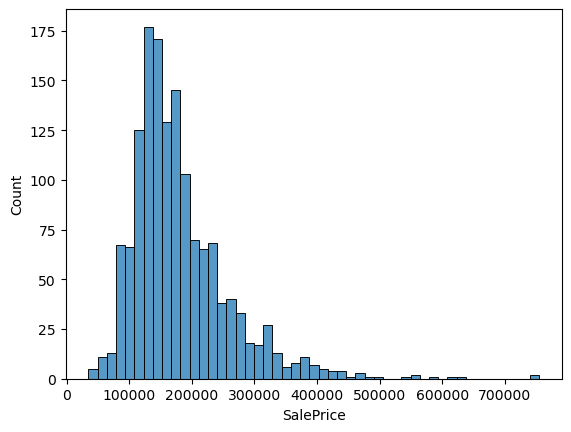

OverallQual


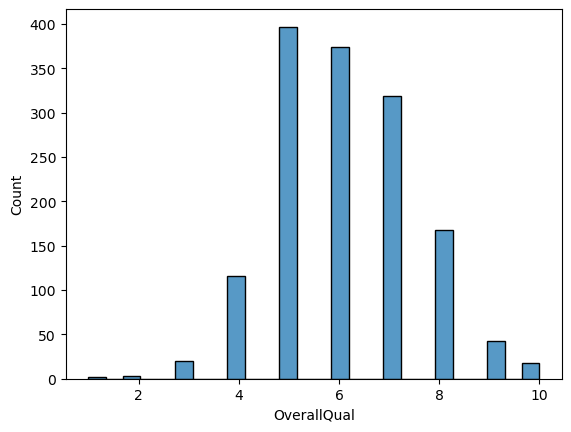

1stFlrSF


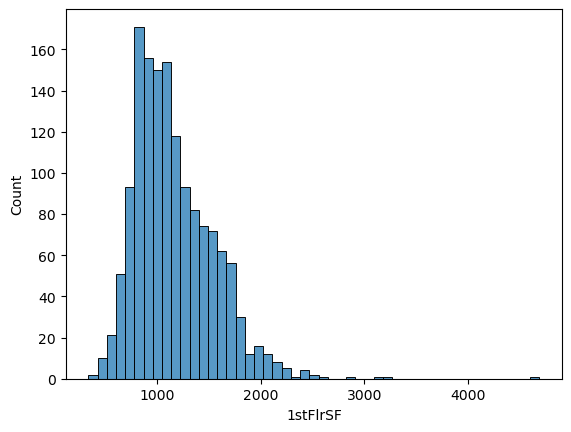

TotRmsAbvGrd


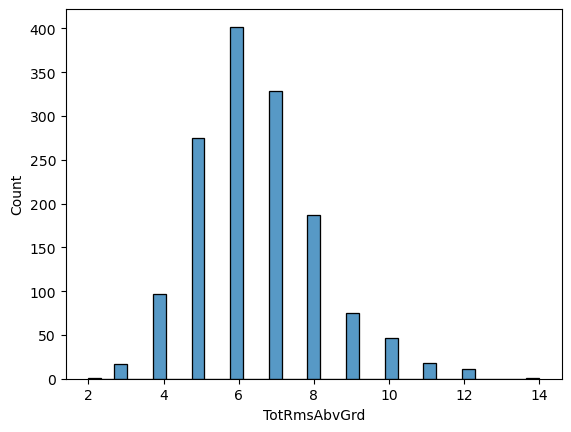

YearBuilt


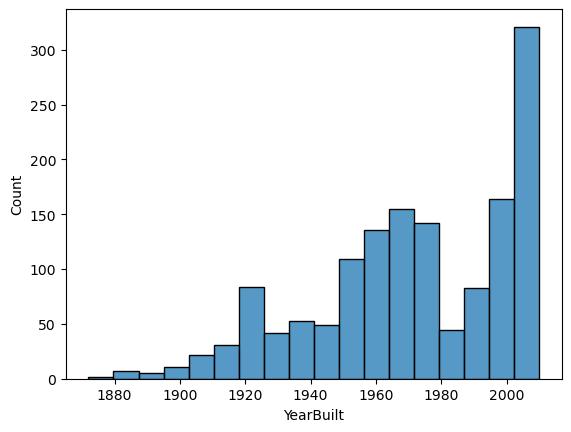

LotFrontage


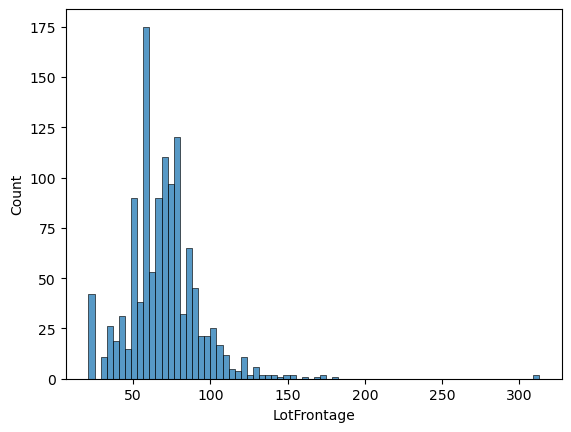

In [598]:
for col_hist in df.columns:
    print(col_hist)
    sns.histplot(data=df,x=col_hist)
    plt.show()



### 4.1 Correlaciones 

Esta seccion pretende definir cuales son aquellas variables con una mayor correlacion con el precio final de las casas.

Correlacion entre 'SalePrice' y OverallQual es: 0.7909816005838047



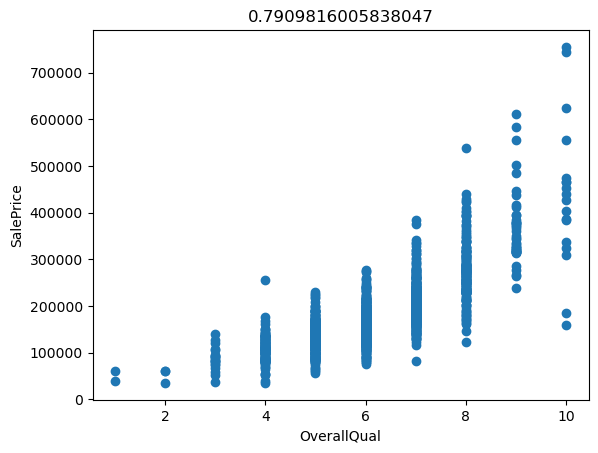

-------------------------------------------------------------------
Correlacion entre 'SalePrice' y 1stFlrSF es: 0.6058521846919148



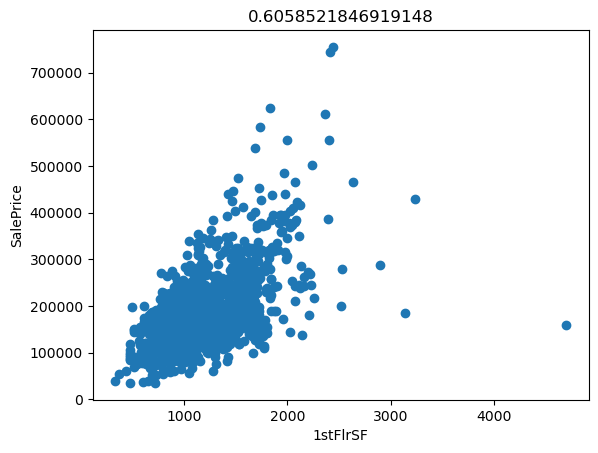

-------------------------------------------------------------------
Correlacion entre 'SalePrice' y TotRmsAbvGrd es: 0.5337231555820284



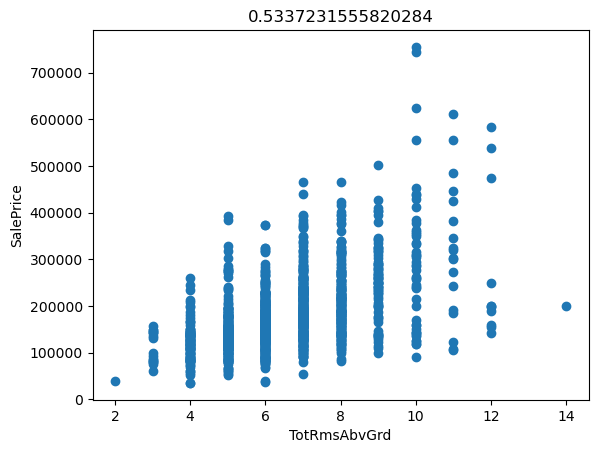

-------------------------------------------------------------------
Correlacion entre 'SalePrice' y YearBuilt es: 0.5228973328794969



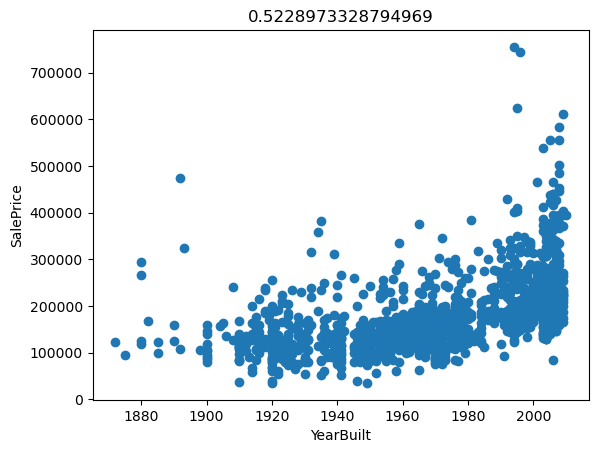

-------------------------------------------------------------------
Correlacion entre 'SalePrice' y LotFrontage es: 0.35179909657067804



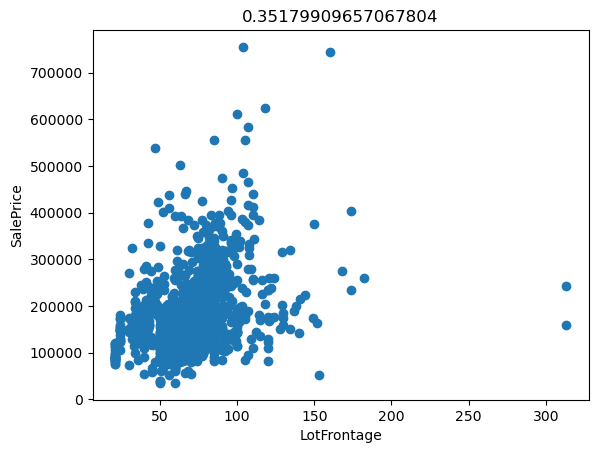

-------------------------------------------------------------------


In [599]:
for corr in df.columns[1:]:
    correlacion = df[corr].corr(df['SalePrice'])
    print(f"Correlacion entre 'SalePrice' y {corr} es: {correlacion}")
    print()
    plt.scatter(df[corr],df['SalePrice'])
    plt.title(correlacion)
    plt.xlabel(corr)
    plt.ylabel('SalePrice')
    plt.show()
    print("-------------------------------------------------------------------")

In [600]:
df.corr()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


## 5. Seleccion de Variables

Las variables que presentan una mayor correlacion con la variable objetivo 'SalePrice' son 'OverallQual'[1] y '1stFlrSF'[2].

## 6. Slicing - Train & Test

###     6.1 Slicing para la variable objetivo

Se crea un DataFrame para la variable objetivo Y (SalePrice) el cual contiene unicamente valores sobre esa variable en especifico - Entreno y Test

In [601]:
Y = df['SalePrice'].to_numpy()

print(Y.__class__)
Y.dtype

<class 'numpy.ndarray'>


dtype('float64')

Se define un 80% de las filas para el entrenamiento del modelo

In [602]:
Y_Train = Y[:int(0.80*len(Y))]
print(Y_Train.shape)
print(Y_Train)

(1168,)
[208500. 181500. 223500. ... 233170. 245350. 173000.]


Se define un 20% para la prueba/test del modelo

In [603]:
Y_Test = Y[:int(0.20*len(Y))]
Y_Test.shape

(292,)

### 6.2 Se define un DataFrame para X1 y X2 (OverallQual y 1stFlrSF) - Entreno y Test

Se crea un Dataframe para 'OverallQual' (X1) el cual contiene unicamente valores sobre esa variable en especifico - Entreno (X1_Train) y Prueba (X1_Test). Se realiza .reshape sobrel el dataframe para poder trabajar con él en 2 dimensiones

In [604]:
X1 = df['OverallQual'].to_numpy()
X1 = X1.reshape(1460,1) # para 2 dimensiones


print(X1)
print(X1.shape)
print(X1.ndim)






[[7.]
 [6.]
 [7.]
 ...
 [7.]
 [5.]
 [5.]]
(1460, 1)
2


Se define un 80% de las filas para el entrenamiento del modelo

In [605]:
X1_Train = X1[:int(0.80*len(X1))]
X1_Train.flatten().shape


(1168,)

In [606]:

X1_Test = X1[:int(0.20*len(X1))]
X1_Test.shape

(292, 1)

### 6.3 Se crea un Dataframe para '1stFlrSF' (X2) - Entreno (X2_Train) y Prueba (X2_Test)

In [607]:
X2 = df['1stFlrSF'].to_numpy()
X2 = X2.reshape(1460,1) #para 2 dimensiones

print(X2)
print(X2.shape)
print(X2.ndim)



[[ 856.]
 [1262.]
 [ 920.]
 ...
 [1188.]
 [1078.]
 [1256.]]
(1460, 1)
2


In [608]:
X2_Train = X2[:int(0.80*len(X2))]
X2_Train.shape

(1168, 1)

In [609]:
X2_Test = X2[:int(0.20*len(X2))]
X2_Test.shape

(292, 1)

# 7. Prueba de Modelo

In [610]:
Prueba = RegresionLineal()

reg_prueba_parametros, reg_prueba_error = Prueba.ajustar(X1_Train,Y_Train, 1000, 250, 0.0001)




#Prediccion = Prueba.predecir(X1_Test)

   Epochs         Error
0     249  3.833169e+09
1     499  1.721164e+09
2     749  1.437010e+09
3     999  1.398343e+09
[[array([0., 0., 0., ..., 0., 0., 0.])]
 [array([849.6223994 , 730.82763202, 849.6223994 , ..., 849.6223994 ,
         968.41716678, 730.82763202])                                ]
 [array([1695.84032633, 1458.72653294, 1695.84032633, ..., 1695.84032633,
         1932.95411973, 1458.72653294])                                  ]
 [array([2538.66742337, 2183.70843891, 2538.66742337, ..., 2538.66742337,
         2893.62640783, 2183.70843891])                                  ]
 [array([3378.11727842, 2905.78503907, 3378.11727842, ..., 3378.11727842,
         3850.44951776, 2905.78503907])                                  ]
 [array([4214.20342494, 3624.96797572, 4214.20342494, ..., 4214.20342494,
         4803.43887416, 3624.96797572])                                  ]
 [array([5046.93934216, 4341.26884448, 5046.93934216, ..., 5046.93934216,
         5752.60983983, 4341.

<module 'matplotlib.pyplot' from 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

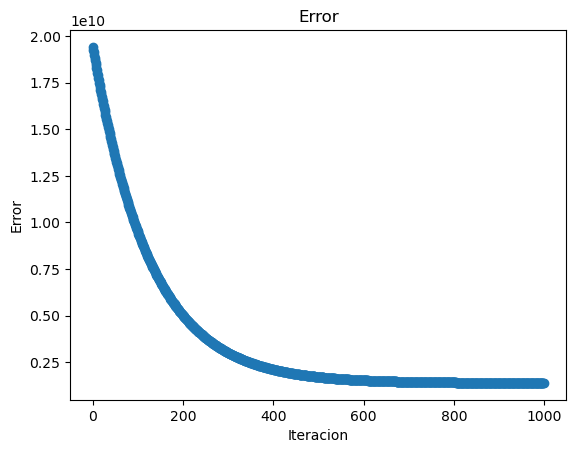

In [611]:
Prueba.graficar_error() #Esta funcion recibe el dataframe de errores y lo grafica.

(1168000,)


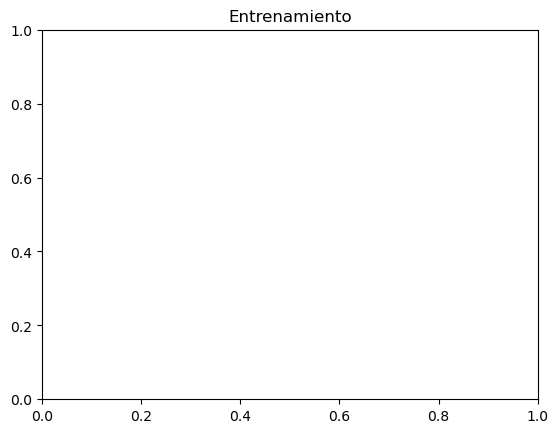

In [612]:
Prueba.graficar_entreno()

In [613]:
prueba_x1 = np.array([[1,2], [3,4], [5,6], [7,8], [9, 10] ])

print(prueba_x1)
print(prueba_x1.shape)
print(prueba_x1.ndim)



print()



n_filas_x1, n_columnas_x1 = prueba_x1.shape

prueba_pendiente = np.zeros(n_columnas_x1)

print(prueba_pendiente)
print(prueba_pendiente.shape)
print(prueba_pendiente.ndim)


print()

prueba_intercepto = np.array([1])
print(prueba_intercepto)
print(prueba_intercepto.shape)
print(prueba_intercepto.ndim)



parametros_pendiente_intercepto = np.array([prueba_pendiente, prueba_intercepto])

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
(5, 2)
2

[0. 0.]
(2,)
1

[1]
(1,)
1


C:\Users\Rodrigo Aragon\AppData\Local\Temp\ipykernel_15488\2350648217.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  parametros_pendiente_intercepto = np.array([prueba_pendiente, prueba_intercepto])


(200, 1)
2

(200,)
1
   Epochs       Error
0     249  197.340543
1     499  181.861550
2     749  181.715035
3     999  181.713593
[[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.])                                       ]
 [array([-0.27301739, -0.36021858, -0.53966982,  1.16270377,  0.09363716,
         -0.16084998, -0

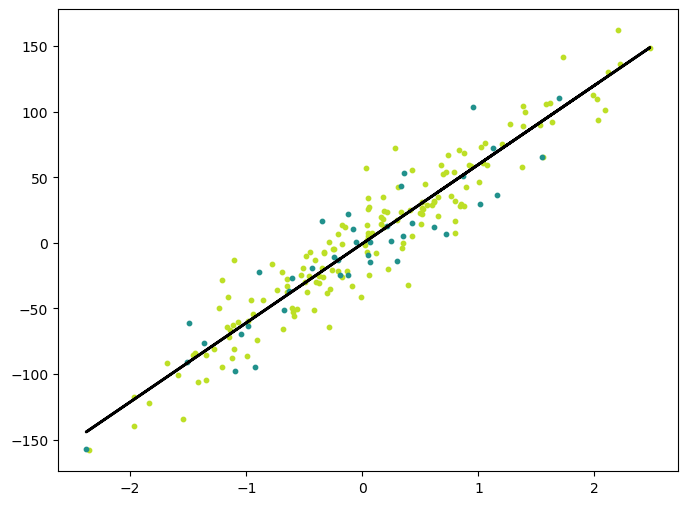

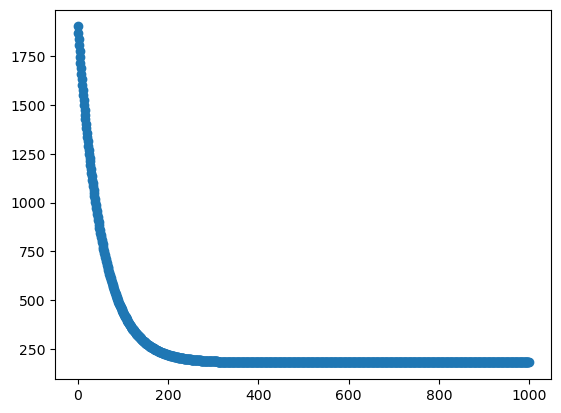

[[ 0.64979034]
 [ 1.27181862]
 [ 0.04613557]
 [ 1.00598199]
 [ 1.20200259]
 [ 1.16418756]
 [ 0.30044554]
 [ 0.4250724 ]
 [-0.41830152]
 [-0.98299165]
 [-0.7322647 ]
 [ 0.29714121]
 [ 1.57887425]
 [-0.13070464]
 [ 2.22336022]
 [-0.33617984]
 [ 0.28086468]
 [ 2.11573584]
 [-0.64764453]
 [-0.5648753 ]
 [-1.35003972]
 [ 2.03217933]
 [-0.59038339]
 [-0.48084914]
 [-0.2910958 ]
 [-0.28324629]
 [-0.34610187]
 [-1.23313682]
 [ 0.80208661]
 [-0.89097573]
 [ 1.3799201 ]
 [-1.09712188]
 [-0.68114843]
 [-0.37444492]
 [-0.90543814]
 [-0.9617768 ]
 [-0.45104291]
 [-1.44026488]
 [ 0.69359851]
 [-0.33145256]
 [ 1.12837333]
 [ 0.83783635]
 [-1.41622753]
 [-0.99590893]
 [-1.68296489]
 [ 0.55618522]
 [ 0.17941071]
 [-0.25219751]
 [ 0.87084178]
 [-1.11281215]
 [ 0.54245131]
 [ 1.01156174]
 [ 0.61353263]
 [ 0.22225175]
 [-1.0448237 ]
 [ 0.50991978]
 [-0.9443686 ]
 [ 0.89510438]
 [-0.67690095]
 [-1.49585236]
 [ 0.91484096]
 [-1.45553433]
 [ 2.20356402]
 [-0.12656859]
 [ 0.5080733 ]
 [ 0.3523434 ]
 [-0.32956

In [614]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=200, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#print(X)
print(X.shape)
print(X.ndim)

print()


#print(y)
print(y.shape)
print(y.ndim)

reg = RegresionLineal()

plt_parametros, plt_error = reg.ajustar(X_train, y_train, 1000, 250, 0.01)
predictions = reg.predecir(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predecir(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))


m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)


plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

plt.scatter(plt_error['Epochs'], plt_error['Error'])
plt.show()

print(X)
print(X.shape)
print()
print(y_pred_line)
print(y_pred_line.shape)




